# Linear regression

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [26]:
ln = LinearRegression()

In [2]:
galton = pd.read_csv('data_galton.csv')

In [4]:
galton.shape

(928, 2)

In [5]:
galton.head(5)

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [6]:
galton.corr()

,child,parent
child,1.000000,0.458762
parent,0.458762,1.000000


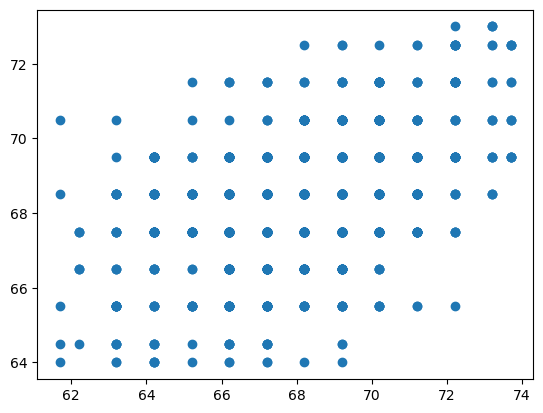

In [9]:
plt.scatter(galton['child'], galton['parent'])
plt.show()

In [16]:
parents = galton['parent'].value_counts().sort_index()
children = galton['child'].value_counts().sort_index()

parents.head()

parent
64.0     14
64.5     23
65.5     66
66.5     78
67.5    211
Name: count, dtype: int64

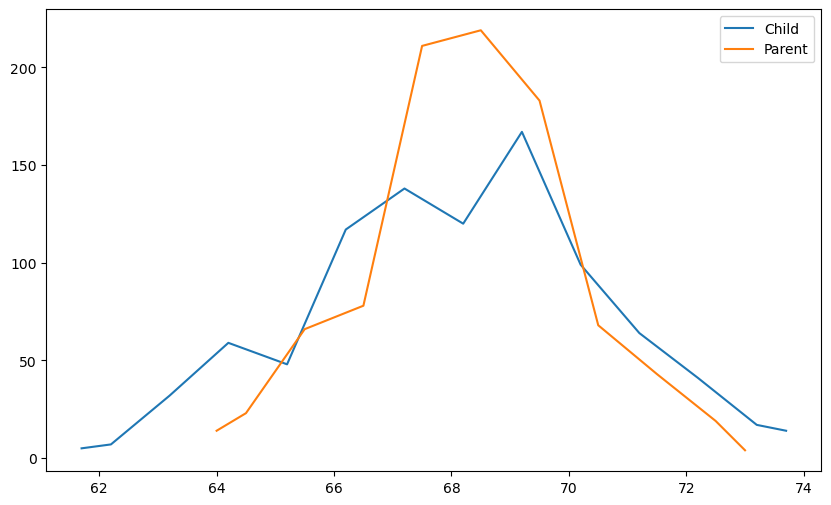

In [17]:
plt.figure(figsize=(10,6))

plt.plot(children.index, children.values, label='Child')
plt.plot(parents.index, parents.values, label='Parent')
plt.legend()
plt.show()

<Axes: xlabel='parent', ylabel='child'>

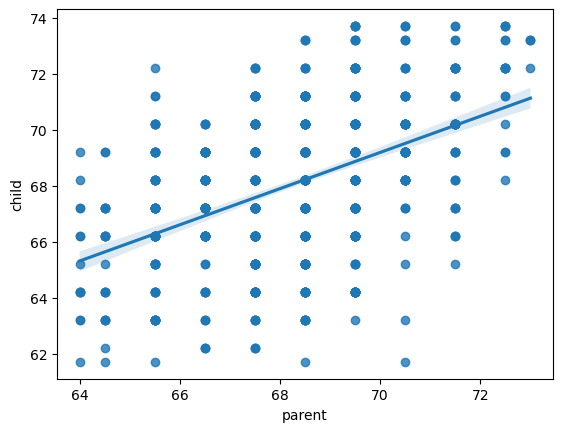

In [20]:
sb.regplot(data=galton, x='parent', y='child')

In [56]:
avg_children = galton.groupby('parent').mean().sort_values(by='parent')

,child
parent,
64.0,65.307143
64.5,65.395652
65.5,66.707576
66.5,67.058974
67.5,67.588626
68.5,68.019635
69.5,68.705464
70.5,69.597059
71.5,70.083721


In [45]:
cross_tabulation = pd.crosstab(index=galton['parent'], columns=galton['child'])

In [43]:


# Transform the cross table so that it could be displyed as a Scatter plot. 
# Size of point = Frequency.
nrows = cross_tabulation.shape[0]
ncols = cross_tabulation.shape[1]
print(nrows, ncols)
childHeights = list(cross_tabulation.columns)
parentHeights = list(cross_tabulation.index)
combo = [ (x,y,cross_tabulation.loc[x,y]) for x in parentHeights for y in childHeights]
combo

11 14


[(64.0, 61.7, 1),
 (64.0, 62.2, 0),
 (64.0, 63.2, 2),
 (64.0, 64.2, 4),
 (64.0, 65.2, 1),
 (64.0, 66.2, 2),
 (64.0, 67.2, 2),
 (64.0, 68.2, 1),
 (64.0, 69.2, 1),
 (64.0, 70.2, 0),
 (64.0, 71.2, 0),
 (64.0, 72.2, 0),
 (64.0, 73.2, 0),
 (64.0, 73.7, 0),
 (64.5, 61.7, 1),
 (64.5, 62.2, 1),
 (64.5, 63.2, 4),
 (64.5, 64.2, 4),
 (64.5, 65.2, 1),
 (64.5, 66.2, 5),
 (64.5, 67.2, 5),
 (64.5, 68.2, 0),
 (64.5, 69.2, 2),
 (64.5, 70.2, 0),
 (64.5, 71.2, 0),
 (64.5, 72.2, 0),
 (64.5, 73.2, 0),
 (64.5, 73.7, 0),
 (65.5, 61.7, 1),
 (65.5, 62.2, 0),
 (65.5, 63.2, 9),
 (65.5, 64.2, 5),
 (65.5, 65.2, 7),
 (65.5, 66.2, 11),
 (65.5, 67.2, 11),
 (65.5, 68.2, 7),
 (65.5, 69.2, 7),
 (65.5, 70.2, 5),
 (65.5, 71.2, 2),
 (65.5, 72.2, 1),
 (65.5, 73.2, 0),
 (65.5, 73.7, 0),
 (66.5, 61.7, 0),
 (66.5, 62.2, 3),
 (66.5, 63.2, 3),
 (66.5, 64.2, 5),
 (66.5, 65.2, 2),
 (66.5, 66.2, 17),
 (66.5, 67.2, 17),
 (66.5, 68.2, 14),
 (66.5, 69.2, 13),
 (66.5, 70.2, 4),
 (66.5, 71.2, 0),
 (66.5, 72.2, 0),
 (66.5, 73.2, 0),
 (66

In [44]:
combo = pd.DataFrame(combo, columns = ['x','y','freq'])
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


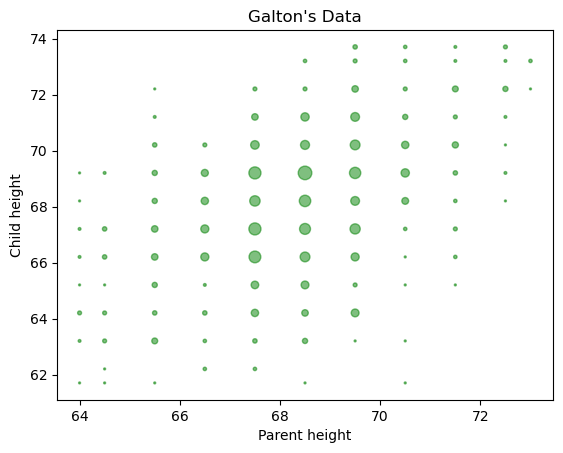

In [40]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

In [30]:
ln.fit(galton[['parent']], galton[['child']])

LinearRegression()

In [36]:
predY = ln.predict(galton[['parent']])

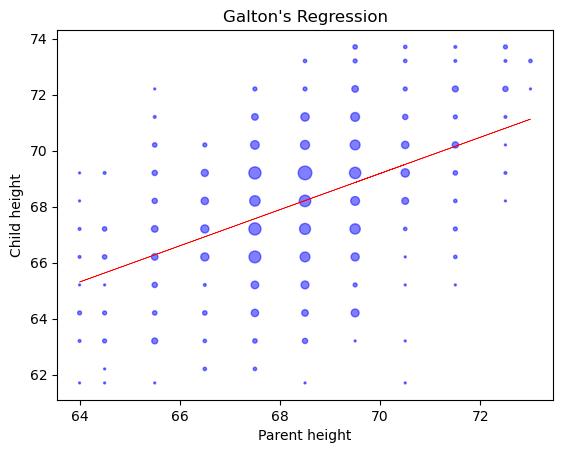

In [41]:


# Show the Scatter plot + Regression line.
plt.plot(galton.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()



# Boston Housing Dataset

In [57]:
boston = pd.read_csv('HousingData.csv')

In [59]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [60]:
boston.shape

(506, 14)